In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

# Feture Engineering:Removing null values

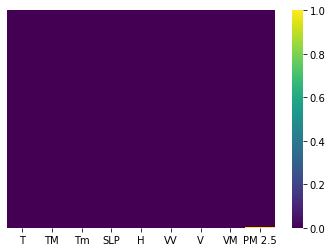

In [5]:
#Checkfor null values using heatmap
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=True)

Interpretation:Can see a nulll value at the bottom right on PM2.5

In [6]:
#Removing null values 
df=df.dropna()

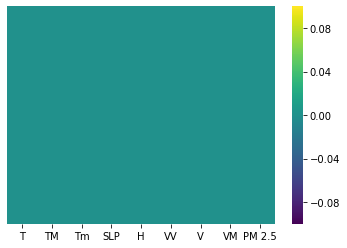

In [7]:
#Checkfor null values using heatmap after removing them
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=True)

Interpretation:Can see that the data is clean

# Define Independent and Dependent features

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Train test split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
X_train.shape

(632, 8)

In [16]:
y_train.shape

(632,)

In [17]:
X.shape

(904, 8)

In [18]:
y.shape

(904,)

In [19]:
X_test.shape

(272, 8)

In [20]:
y_test.shape

(272,)

# Decision Trees:Build Model

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
treeregressor=DecisionTreeRegressor(criterion="mse")

In [24]:
treeregressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
print('Coefficient of determination R^2 on train data: {}'.format(treeregressor.score(X_train,y_train)))
print('Coefficient of determination R^2 on test data: {}'.format(treeregressor.score(X_test,y_test)))

Coefficient of determination R^2 on train data: 1.0
Coefficient of determination R^2 on test data: 0.11338779278833677


Interpretation:From the above R^2 values we can clearly see that we have a overfitting issue

We have high variance between the R^2 value of train and test data.

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
crosssvaldecisiontreeregressor=cross_val_score(treeregressor,X,y,cv=4)
crosssvaldecisiontreeregressor.mean()

0.006781805986338263

In [ ]:
The score went down even below.

# Model Evaluation

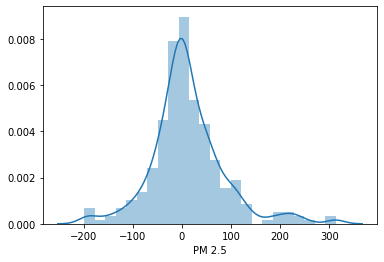

In [33]:
#predict using the model for the test data
prediction=treeregressor.predict(X_test)
sns.distplot(prediction-y_test)

we can see a very slight bell curve and it is not normally distributed

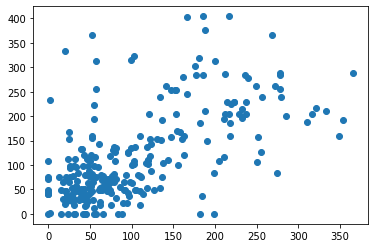

In [35]:
plt.scatter(y_test,prediction)

In [ ]:
We can see no clear pattern

# Hyperparameter tuning Decision tree Regressor

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [38]:
search=GridSearchCV(treeregressor,param_grid=params,scoring='neg_mean_squared_error',cv=10,
    verbose=3,n_jobs=-1)

In [42]:
search.fit(X,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 1645 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 3437 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 5741 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 8557 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 11885 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 15725 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 20077 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 24941 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 30317 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 36205 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 42605 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 49517 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 56941 ta

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60,

In [43]:
search.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [44]:
search.best_score_

-3468.135532063188

In [45]:
print('Decision Tree regression score:{}'.format(search.best_score_))

Decision Tree regression score:-3468.135532063188


Interpretation:

Compare to previous model the Decision Tree score is much closer to zero indicating less error:
Decision Tree regression score:-3468.135532063188       
Lasso regression score:-3493.719817078534
Ridge regression score:-3501.974141971
Linear regression score:-3576.1976560478724

# Model Evaluation after Hyper parameteroptimizing

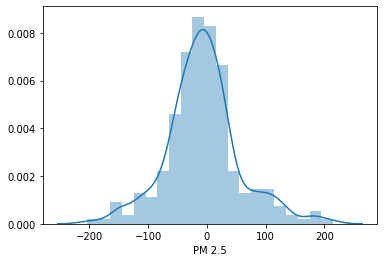

In [46]:
prediction=search.predict(X_test)
sns.distplot(y_test-prediction)

# Interpretation:

This is very close to a bell curve indicating normal distribution.

The model we have does not have the overfitting problem due to hyperparameter optimization.

Hence the prediction works fine for the test data

# Regression evaluation Metrics:

In [47]:
from sklearn import metrics

In [48]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 46.182210644250354
MSE: 4024.7054356574304
RMSE: 63.440566167535344


# Save the Model

In [49]:
import pickle

In [50]:
file=open('desiciontree_regressor.pkl','wb')
pickle.dump(search,file)

In [1]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

NameError: name 'sklearn' is not defined

In [4]:
import sklearn

In [5]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.21.2.


In [6]:
print('The scikit-learn version is {}.'.format(np.__version__))

NameError: name 'np' is not defined

In [7]:
import numpy

In [8]:
print('The scikit-learn version is {}.'.format(numpy.__version__))

The scikit-learn version is 1.16.4.


In [ ]:
import 